In [2]:
from ComplexNetworks import Encoder,Decoder
import torch
import torch.nn as nn
import os 
import sys
from  tqdm import tqdm
main_path =  os.getcwd()+"/../../"
sys.path.insert(0, main_path+"conf")
sys.path.insert(0, main_path+"controllers")
from config import *
from Constants import *
from Recieved import RX


In [3]:
def Complex_MSE(output,target):
    return torch.sum((target-output).abs())

def Complex_MSE_polar(output,target):
    return torch.sum(torch.log(torch.pow(output.abs()/target.abs(),2))+torch.pow(output.angle()-target.angle(),2))

### Define the loss function
loss_fn = Complex_MSE

### Define an optimizer (both for the encoder and the decoder!)
lr= 0.0005

### Set the random seed for reproducible results
torch.manual_seed(0)

### Initialize the two networks
d = 48

#model = Autoencoder(encoded_space_dim=encoded_space_dim)
encoder = Encoder(encoded_space_dim=d)
decoder = Decoder(encoded_space_dim=d)
params_to_optimize = [
    {'params': encoder.parameters()},
    {'params': decoder.parameters()}
]

optim = torch.optim.Adam(params_to_optimize, lr=lr,weight_decay=.0001)

# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

# Move both the encoder and the decoder to the selected device
encoder.to(device)
decoder.to(device)
#load data with QAM 16
data   = RX(4,"Unit_Pow")

# Set train mode for both the encoder and the decoder
encoder.train()
decoder.train()
train_loss = []

Selected device: cuda


In [4]:
#TRAIN
for EPOCHS in range(0,31):
    print("EPOCH {}".format(EPOCHS))
    loop  = tqdm(range(0,int(data.total*.6)),desc="Progress")
    for i in loop:
        chann = torch.from_numpy(data.H[:,:,i]).to(device)
        chann = chann[None,None,:,:]
        #### Encode data
        z = encoder(chann)
        decoded_image = decoder(z)
        # Evaluate loss
        loss = loss_fn(decoded_image, chann)

        # Backward pass
        optim.zero_grad()
        loss.backward()
        optim.step()
        if(i % 20 == 0):
            loop.set_description(f"EPOCH[{EPOCHS}]")
            loop.set_postfix(loss=loss.cpu().detach().numpy())

EPOCH 0


EPOCH[0]: 100%|██████████| 12000/12000 [04:22<00:00, 45.66it/s, loss=53.327477]


EPOCH 1


EPOCH[1]: 100%|██████████| 12000/12000 [05:29<00:00, 36.46it/s, loss=50.54514] 


EPOCH 2


EPOCH[2]: 100%|██████████| 12000/12000 [04:45<00:00, 42.03it/s, loss=49.352577]


EPOCH 3


EPOCH[3]: 100%|██████████| 12000/12000 [03:33<00:00, 56.19it/s, loss=23.170143]


EPOCH 4


EPOCH[4]: 100%|██████████| 12000/12000 [04:10<00:00, 47.94it/s, loss=20.739746]


EPOCH 5


EPOCH[5]: 100%|██████████| 12000/12000 [05:56<00:00, 33.70it/s, loss=19.581234]


EPOCH 6


EPOCH[6]: 100%|██████████| 12000/12000 [05:12<00:00, 38.44it/s, loss=19.20848]  


EPOCH 7


EPOCH[7]: 100%|██████████| 12000/12000 [05:56<00:00, 33.65it/s, loss=19.257778]


EPOCH 8


EPOCH[8]: 100%|██████████| 12000/12000 [05:57<00:00, 33.53it/s, loss=19.545519]


EPOCH 9


EPOCH[9]: 100%|██████████| 12000/12000 [04:46<00:00, 41.83it/s, loss=19.697886] 


EPOCH 10


EPOCH[10]: 100%|██████████| 12000/12000 [03:33<00:00, 56.21it/s, loss=19.408875] 


EPOCH 11


EPOCH[11]: 100%|██████████| 12000/12000 [03:51<00:00, 51.92it/s, loss=18.629326]


EPOCH 12


EPOCH[12]: 100%|██████████| 12000/12000 [04:48<00:00, 41.57it/s, loss=18.747375]


EPOCH 13


EPOCH[13]: 100%|██████████| 12000/12000 [05:55<00:00, 33.79it/s, loss=18.265072]


EPOCH 14


EPOCH[14]: 100%|██████████| 12000/12000 [04:04<00:00, 49.05it/s, loss=18.329617] 


EPOCH 15


EPOCH[15]: 100%|██████████| 12000/12000 [05:55<00:00, 33.78it/s, loss=18.847073] 


EPOCH 16


EPOCH[16]: 100%|██████████| 12000/12000 [05:52<00:00, 34.06it/s, loss=18.613926] 


EPOCH 17


EPOCH[17]: 100%|██████████| 12000/12000 [05:41<00:00, 35.19it/s, loss=17.908844]


EPOCH 18


EPOCH[18]: 100%|██████████| 12000/12000 [04:43<00:00, 42.37it/s, loss=18.89034]  


EPOCH 19


EPOCH[19]: 100%|██████████| 12000/12000 [05:54<00:00, 33.84it/s, loss=18.042816] 


EPOCH 20


EPOCH[20]: 100%|██████████| 12000/12000 [05:54<00:00, 33.86it/s, loss=18.526707]


EPOCH 21


EPOCH[21]: 100%|██████████| 12000/12000 [05:57<00:00, 33.54it/s, loss=17.988995]


EPOCH 22


EPOCH[22]: 100%|██████████| 12000/12000 [05:45<00:00, 34.75it/s, loss=18.37144]  


EPOCH 23


EPOCH[23]: 100%|██████████| 12000/12000 [05:33<00:00, 35.96it/s, loss=9.213559]  


EPOCH 24


EPOCH[24]: 100%|██████████| 12000/12000 [05:16<00:00, 37.96it/s, loss=7.9426346]


EPOCH 25


EPOCH[25]: 100%|██████████| 12000/12000 [03:11<00:00, 62.52it/s, loss=7.830249]  


EPOCH 26


EPOCH[26]: 100%|██████████| 12000/12000 [05:36<00:00, 35.64it/s, loss=8.100086]  


EPOCH 27


EPOCH[27]: 100%|██████████| 12000/12000 [05:59<00:00, 33.41it/s, loss=7.4717417]


EPOCH 28


EPOCH[28]: 100%|██████████| 12000/12000 [05:58<00:00, 33.43it/s, loss=8.240904] 


EPOCH 29


EPOCH[29]: 100%|██████████| 12000/12000 [05:51<00:00, 34.12it/s, loss=7.5523357] 


EPOCH 30


EPOCH[30]: 100%|██████████| 12000/12000 [03:13<00:00, 62.01it/s, loss=7.348131]  


In [5]:
#TEST    
encoder.eval()
decoder.eval() 
loop  = tqdm(range(int(data.total*.6),data.total),desc="Progress")
with torch.no_grad():
    input_image = []
    recon_image = []
    for i in loop:
        chann = torch.from_numpy(data.H[:,:,i]).to(device)
        chann = chann[None,None,:,:]
        z = encoder(chann)
        # Decode data
        decoded_image = decoder(z)
        val_loss = loss_fn(chann, decoded_image)
        #print loss
        if(i % 50 == 0):
            loop.set_postfix(loss=loss.cpu().detach().numpy())
            
        #Append overall
        recon_image.append(decoded_image.cpu()) # AUtoenconder output
        input_image.append(chann.cpu()) # Autoenconder input
        
    input_image = torch.cat(input_image)
    recon_image = torch.cat(recon_image) 
        
    val_loss = loss_fn(input_image, recon_image)

Progress: 100%|██████████| 8000/8000 [00:31<00:00, 251.83it/s, loss=5.230404]


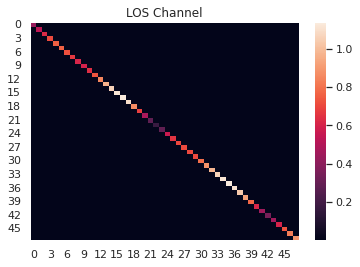

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme()
chann = abs(data.H[:,:,3])
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(chann.real)
#sns.heatmap(chann.real)
plt.title( "LOS Channel" )
plt.show()



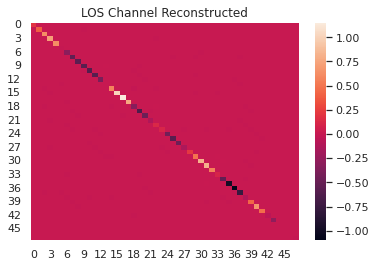

In [43]:
chann = torch.from_numpy(data.H[:,:,3]).to(device)
chann = chann[None,None,:,:]
z = encoder(chann)
decoded_image = decoder(z)
decoded_image = decoded_image.cpu().detach().numpy()
chann = decoded_image
chann = np.reshape(chann,(48,48))
sns.heatmap(chann.real)
plt.title( "LOS Channel Reconstructed" )
plt.show()


In [41]:
Y      = data.Qsym.r[:,0]
H_vect = z.cpu().detach().numpy()
Y_hat = data.Qsym.GroundTruth[:,0]*H_vect.T
error = np.sum(abs(Y-Y_hat))
print(error)

33.87088138849304


Test BER with dimensionality reduction of the channel 

In [42]:
sys.path.insert(0, main_path+"tools")
from utils import vector_to_pandas ,get_time_string

def LMSE(H,Y,SNR):
    return Y*1/H

BER    = []
for SNR in range(GOLDEN_BEST_SNR,GOLDEN_WORST_SNR-1,-1*GOLDEN_STEP):
        loop   = tqdm(range(0,data.total),desc="Progress")
        errors = 0
        data.AWGN(SNR)
        for i in loop:
            #Get realization
            Y = data.Qsym.r[:,i]        
            chann = torch.from_numpy(data.H[:,:,i]).to(device)
            chann = chann[None,None,:,:]
            z = encoder(chann)
            H_vect = z.cpu().detach().numpy()
            
            X_hat  = LMSE(H_vect.T,Y,SNR)
            
            txbits = np.squeeze(data.Qsym.bits[:,i],axis=1)
            rxbits = data.Qsym.Demod(X_hat)
            errors+=np.unpackbits((txbits^rxbits).view('uint8')).sum()
            
            #Status bar and monitor  
            if(i % 500 == 0):
                loop.set_description(f"SNR [{SNR}]")
                loop.set_postfix(ber=errors/((data.bitsframe*data.sym_no)*data.total))
                
        BER.append(errors/((data.bitsframe*data.sym_no)*data.total))
        
vector_to_pandas("Golden_{}_BER_SNR{}.csv".format(Select,get_time_string()),BER)

SNR [45]:  36%|███▌      | 7105/20000 [00:19<00:34, 373.14it/s, ber=0.173] 


KeyboardInterrupt: 